ВАРИАНТ 11

ЗАДАНИЕ 1

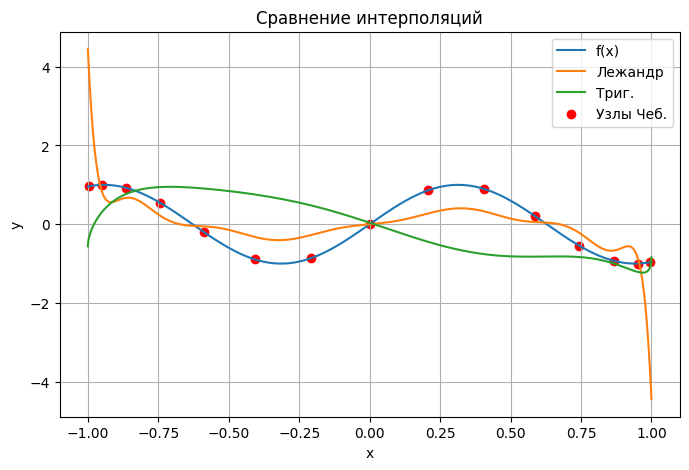

Макс. ошибка (Лежандр): 3.4861
Макс. ошибка (Триг.): 1.6839


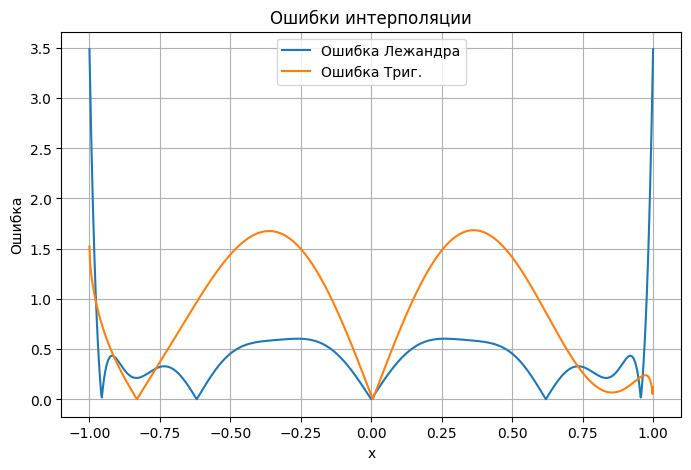

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import legval
from scipy.fft import fft, ifft

def cheb_nodes(m):
    j = np.arange(m)
    return np.cos((2 * j + 1) * np.pi / (2 * m))

def legendre_interp(x, y, m):
    c = np.zeros(m)
    for k in range(m):
        c[k] = (2 * k + 1) / (2 * m) * np.sum(y * legval(x, [0] * k + [1]))
    return lambda z: legval(z, c)

def trig_interp(x, y, m):
    t = np.arccos(x)
    f_t = y
    coeffs = fft(f_t) / m
    a = 2*np.real(coeffs[0: m//2 +1])
    b = -2*np.imag(coeffs[1:m//2])
    if m%2==0: a[-1] = a[-1]/2
    def interp_z(z):
        z=np.arccos(z)
        res = a[0] / 2
        for j in range(1, m//2):
            res+= a[j] * np.cos(j*z) + b[j-1] * np.sin(j*z)
        if m % 2 == 0:
            res+= a[m//2] * np.cos((m//2) * z) / 2
        return res
    return interp_z

m = 15
f = lambda x: np.sin(5 * x)

x_c = cheb_nodes(m)
y_c = f(x_c)

leg_p = legendre_interp(x_c, y_c, m)
trig_p = trig_interp(x_c, y_c, m)

x_test = np.linspace(-1, 1, 1000)
y_test = f(x_test)
y_leg = leg_p(x_test)
y_trig = trig_p(x_test)

plt.figure(figsize=(8, 5))
plt.plot(x_test, y_test, label='f(x)')
plt.plot(x_test, y_leg, label='Лежандр')
plt.plot(x_test, y_trig, label='Триг.')
plt.scatter(x_c, y_c, color='red', label='Узлы Чебышева')
plt.title('Сравнение интерполяций')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

err_leg = np.abs(y_test - y_leg)
err_trig = np.abs(y_test - y_trig)

print(f"Макс. ошибка (Лежандр): {np.max(err_leg):.4f}")
print(f"Макс. ошибка (Триг.): {np.max(err_trig):.4f}")

plt.figure(figsize=(8, 5))
plt.plot(x_test, err_leg, label='Ошибка Лежандра')
plt.plot(x_test, err_trig, label='Ошибка Триг.')
plt.title('Ошибки интерполяции')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()

ЗАДАНИЕ 2

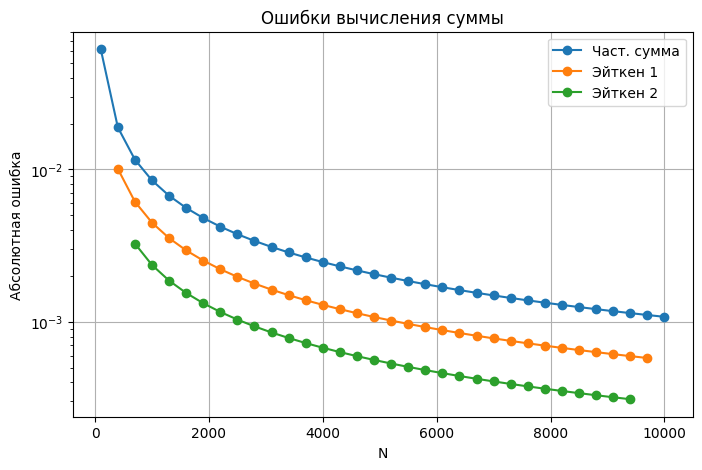

Част. сумма (N=10000): 2.403035
Приближение Эйткен 2: 2.403803
Точное значение: 2.404114
Ошибка част. суммы: 1.078709e-03
Ошибка Эйткен 2: 3.104663e-04


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

def harm_num(n):
    return np.sum(1 / np.arange(1, n + 1))

def part_sum(N):
    s = 0
    for n in range(1, N + 1):
        s += harm_num(n) / n**2
    return s

def aitken_extr(S):
    S_a = np.zeros(len(S) - 2)
    for n in range(len(S) - 2):
        S_a[n] = S[n] - (S[n+1] - S[n])**2 / (S[n+2] - 2*S[n+1] + S[n])
    return S_a

N_vals = np.arange(100, 10001, 300)
p_sums = [part_sum(N) for N in N_vals]

sums_a1 = aitken_extr(p_sums)
sums_a2 = aitken_extr(sums_a1)

exact_v = 2 * zeta(3)

err_part = np.abs(p_sums - exact_v)
err_a1 = np.abs(sums_a1 - exact_v)
err_a2 = np.abs(sums_a2 - exact_v)

plt.figure(figsize=(8, 5))
plt.plot(N_vals, err_part, marker='o', label='Част. сумма')
plt.plot(N_vals[1:-1], err_a1, marker='o', label='Эйткен 1')
plt.plot(N_vals[2:-2], err_a2, marker='o', label='Эйткен 2')

plt.title('Ошибки вычисления суммы')
plt.xlabel('N')
plt.ylabel('Абсолютная ошибка')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

print(f"Част. сумма (N=10000): {part_sum(10000):.6f}")
print(f"Приближение Эйткен 2: {sums_a2[-1]:.6f}")
print(f"Точное значение: {exact_v:.6f}")

print(f"Ошибка част. суммы: {err_part[-1]:.6e}")
print(f"Ошибка Эйткен 2: {err_a2[-1]:.6e}")

ЗАДАНИЕ 3

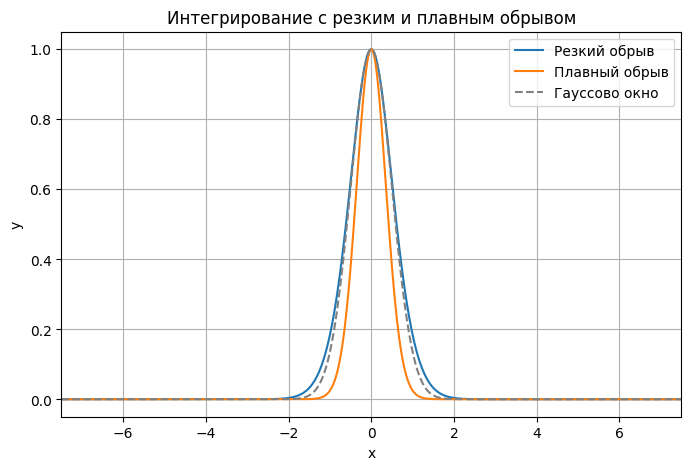

Резкий обрыв: 1.343293421646634, Ошибка: 1.0147438445073931e-13
Плавный обрыв: 0.9027091586076177, Ошибка: 0.4405842630391177
Гауссово окно: 1.2533141373155003, Ошибка: 0.08997928433123503
Точное значение: 1.3432934216467354


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, quad

def f_sharp(x):
    return np.exp(-x**2) / (1 + x**2)

def win_gauss(x, sig):
    return np.exp(-x**2 / (2 * sig**2))

def f_smooth(x, sig):
    return f_sharp(x) * win_gauss(x, sig)

def trapz_int(func, a, b, n):
    x = np.linspace(a, b, n)
    y = func(x)
    return trapezoid(y, x)

R = 5
sig = R / 10
n_pts = 1000

int_sharp = trapz_int(f_sharp, -R, R, n_pts)
int_smooth = trapz_int(lambda x: f_smooth(x, sig), -R, R, n_pts)
int_exact, err_est = quad(f_sharp, -np.inf, np.inf)
int_gauss = trapz_int(lambda x: win_gauss(x, sig), -R, R, n_pts)

err_sharp = abs(int_exact - int_sharp)
err_smooth = abs(int_exact - int_smooth)
err_gauss = abs(int_exact - int_gauss)
diff_approx = abs(int_sharp - int_smooth)

x_plt = np.linspace(-R * 1.5, R * 1.5, 500)
y_plt_sharp = f_sharp(x_plt)
y_plt_smooth = f_smooth(x_plt, sig)
win_plt = win_gauss(x_plt, sig)

plt.figure(figsize=(8, 5))
plt.plot(x_plt, y_plt_sharp, label='Резкий обрыв')
plt.plot(x_plt, y_plt_smooth, label='Плавный обрыв')
plt.plot(x_plt, win_plt * max(y_plt_sharp), '--', color='gray', label='Гауссово окно')
plt.title('Интегрирование с резким и плавным обрывом')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-R * 1.5, R * 1.5])
plt.legend()
plt.grid(True)
plt.show()

print(f"Резкий обрыв: {int_sharp}, Ошибка: {err_sharp}")
print(f"Плавный обрыв: {int_smooth}, Ошибка: {err_smooth}")
print(f"Гауссово окно: {int_gauss}, Ошибка: {err_gauss}")
print(f"Точное значение: {int_exact}")

ЗАДАНИЕ 4

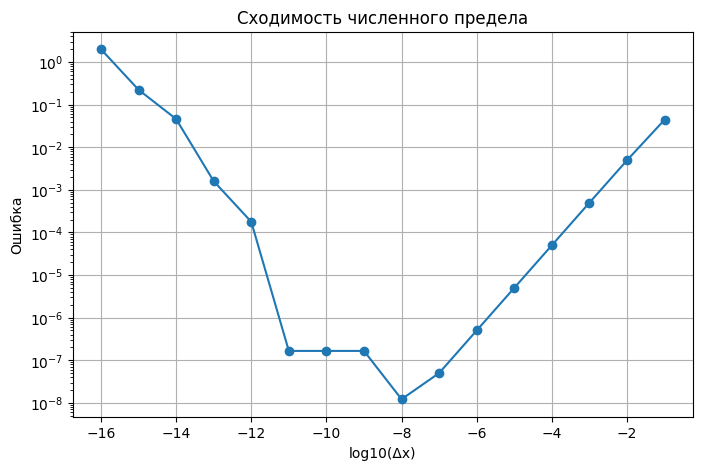

Численные значения предела для разных Δx:
Δx = 1e-01, Предел = 2.0443088, Ошибка = 4.4308831e-02
Δx = 1e-02, Предел = 2.0049417, Ошибка = 4.9417185e-03
Δx = 1e-03, Предел = 2.0004994, Ошибка = 4.9941671e-04
Δx = 1e-04, Предел = 2.0000500, Ошибка = 4.9994173e-05
Δx = 1e-05, Предел = 2.0000050, Ошибка = 5.0000135e-06
Δx = 1e-06, Предел = 2.0000005, Ошибка = 5.0032401e-07
Δx = 1e-07, Предел = 2.0000001, Ошибка = 5.0017547e-08
Δx = 1e-08, Предел = 2.0000000, Ошибка = 1.2154943e-08
Δx = 1e-09, Предел = 2.0000002, Ошибка = 1.6548074e-07
Δx = 1e-10, Предел = 2.0000002, Ошибка = 1.6548074e-07
Δx = 1e-11, Предел = 2.0000002, Ошибка = 1.6548074e-07
Δx = 1e-12, Предел = 2.0001778, Ошибка = 1.7780116e-04
Δx = 1e-13, Предел = 1.9984014, Ошибка = 1.5985557e-03
Δx = 1e-14, Предел = 1.9539925, Ошибка = 4.6007477e-02
Δx = 1e-15, Предел = 1.7763568, Ошибка = 2.2364316e-01
Δx = 1e-16, Предел = 0.0000000, Ошибка = 2.0000000e+00
Аналитический предел: 2.0000000


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if x > 0:
        return np.exp(2*x) + 6
    else:
        return 7 + (2/3) * np.arctan(3*x)

def calc_limit(dx):
    y_pos = f(dx / 2)
    y_neg = f(-dx / 2)
    lim_approx = (y_pos - y_neg) / dx
    return lim_approx

dx_vals = [1e-1]
for i in range(15):
    dx_vals.append(dx_vals[-1]*0.1)
lim_approxs = []

for dx in dx_vals:
    lim_approxs.append(calc_limit(dx))

analyt_lim = 2.0
errs = np.abs(np.array(lim_approxs) - analyt_lim)

plt.figure(figsize=(8, 5))
plt.plot(np.log10(dx_vals), errs, marker='o')
plt.title('Сходимость численного предела')
plt.xlabel('log10(Δx)')
plt.ylabel('Ошибка')
plt.yscale('log')
plt.grid(True)
plt.show()

print("Численные значения предела для разных Δx:")
for i in range(len(dx_vals)):
    print(f"Δx = {dx_vals[i]:.0e}, Предел = {lim_approxs[i]:.7f}, Ошибка = {errs[i]:.7e}")
print(f"Аналитический предел: {analyt_lim:.7f}")